## Import all the libraries

In [26]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

## Define start day to fetch the dataset from the yahoo finance library

In [4]:
START = "2016-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [6]:
data = load_data('AAPL')
df = data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,23.886829,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.288244,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,22.832506,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,21.868868,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,21.984499,283192000


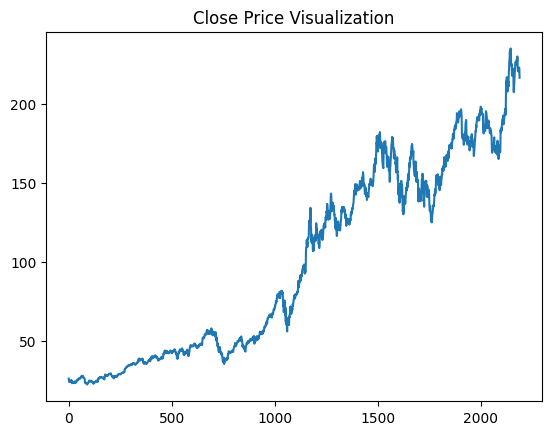

In [7]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,23.886829,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.288244,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,22.832506,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,21.868868,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,21.984499,283192000
...,...,...,...,...,...,...,...
2185,2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51591000
2186,2024-09-11,221.460007,223.089996,217.889999,222.660004,222.660004,44587100
2187,2024-09-12,222.500000,223.550003,219.820007,222.770004,222.770004,37498200
2188,2024-09-13,223.580002,224.039993,221.910004,222.500000,222.500000,36766600


## Plotting moving averages of 100 days

In [10]:
mav100 = df.Close.rolling(100).mean()
mav100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2185    206.791600
2186    207.347800
2187    207.925500
2188    208.492100
2189    208.986301
Name: Close, Length: 2190, dtype: float64

Text(0.5, 1.0, 'Moving Averages Of 100 Days')

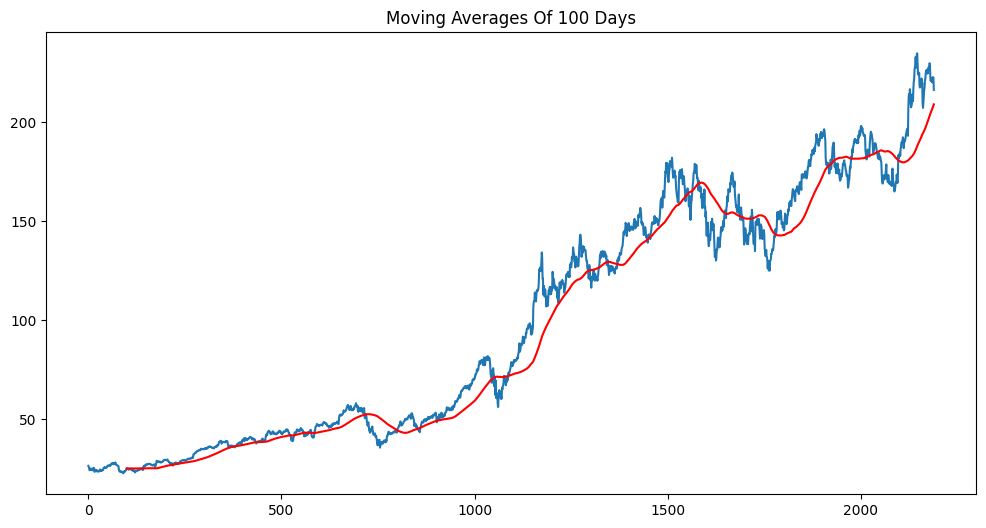

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(mav100, 'r')
plt.title('Moving Averages Of 100 Days')

## Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

In [12]:
mav200 = df.Close.rolling(200).mean()
mav200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2185    195.06125
2186    195.21800
2187    195.38200
2188    195.54555
2189    195.67515
Name: Close, Length: 2190, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

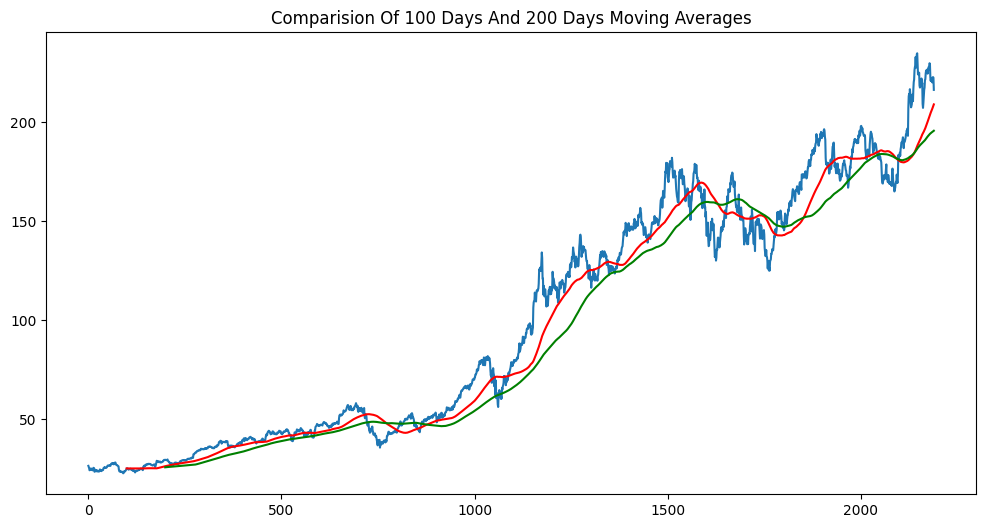

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(mav100, 'r')
plt.plot(mav200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [15]:
df.shape

(2190, 7)

## Spliting the dataset into training (70%) and testing (30%) set

In [16]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data) * 0.70)])
test = pd.DataFrame(data[int(len(data) * 0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1533, 7)
(657, 7)


In [18]:
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,23.886829,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.288244,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,22.832506,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,21.868868,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,21.984499,283192000
...,...,...,...,...,...,...,...
1528,2022-01-27,162.449997,163.839996,158.279999,159.220001,156.826248,121954600
1529,2022-01-28,165.710007,170.350006,162.800003,170.330002,167.769241,179935700
1530,2022-01-31,170.160004,175.000000,169.509995,174.779999,172.152313,115541600
1531,2022-02-01,174.009995,174.839996,172.309998,174.610001,171.984879,86213900


In [17]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1533,2022-02-03,174.479996,176.240005,172.119995,172.899994,170.300552,89418100
1534,2022-02-04,171.679993,174.100006,170.679993,172.389999,170.014572,82465400
1535,2022-02-07,172.860001,173.949997,170.949997,171.660004,169.294617,77251200
1536,2022-02-08,171.729996,175.350006,171.429993,174.830002,172.420959,74829200
1537,2022-02-09,176.050003,176.649994,174.899994,176.279999,173.850967,71285000


## Using MinMax scaler for normalization of the dataset

In [104]:
scaler = MinMaxScaler(feature_range=(0,1))
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [105]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02353772],
       [0.01939784],
       [0.01624589],
       ...,
       [0.95464955],
       [0.95358323],
       [0.96129843]])

In [106]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [107]:
x_train.shape

(1433, 100, 1)

In [108]:
data_testing_array = scaler.fit_transform(test_close)
x_test = []
y_test = [] 

for i in range(100, data_testing_array.shape[0]):
    x_test.append(data_testing_array[i-100: i])
    y_test.append(data_testing_array[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test) 

x_test.shape

(557, 100, 1)

## Model Used - LSTM

In [109]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [110]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

## Model training

In [111]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - MAE: 0.1712 - loss: 0.0638 - val_MAE: 0.0951 - val_loss: 0.0140
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - MAE: 0.0569 - loss: 0.0072 - val_MAE: 0.0851 - val_loss: 0.0110
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - MAE: 0.0460 - loss: 0.0046 - val_MAE: 0.0734 - val_loss: 0.0078
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - MAE: 0.0482 - loss: 0.0052 - val_MAE: 0.0875 - val_loss: 0.0114
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - MAE: 0.0543 - loss: 0.0061 - val_MAE: 0.0751 - val_loss: 0.0081
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - MAE: 0.0454 - loss: 0.0051 - val_MAE: 0.0754 - val_loss: 0.0082
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - MAE: 0.0444 - loss: 0.0051 - val_MAE: 0.0768 - val_loss: 0.0086
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - MAE: 0.0428 - loss: 0.0045 - val_MAE: 0.0721 - val_loss: 0.0077
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - M

In [112]:
model.save('keras_model.h5')

In [113]:
test_close.shape

(657, 1)

In [114]:
past_100_days = pd.DataFrame(train_close[-100:])

In [115]:
test_df = pd.DataFrame(test_close)

#### Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.

In [116]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [117]:
final_df.head()

,0
0,149.550003
1,148.119995
2,149.029999
3,148.789993
4,146.059998


In [118]:
input_data = scaler.fit_transform(final_df)

In [119]:
input_data.shape

(757, 1)

## Model Testing

In [120]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [121]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(657, 100, 1)
(657,)


## Making prediction and plotting the graph of predicted vs actual values

In [122]:
# Making predictions

y_pred = model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


In [124]:
y_pred.shape

(657, 1)

In [125]:
y_test

array([4.36065506e-01, 4.31420748e-01, 4.24772336e-01, 4.53642990e-01,
       4.66848790e-01, 4.28961693e-01, 3.97267746e-01, 3.99453588e-01,
       4.35063679e-01, 4.32877976e-01, 3.99453588e-01, 3.85063773e-01,
       3.57923560e-01, 3.19216824e-01, 3.43533745e-01, 3.62750506e-01,
       3.65209422e-01, 3.47723102e-01, 3.78324197e-01, 3.75318717e-01,
       3.47449889e-01, 3.12204035e-01, 2.95264141e-01, 3.45446235e-01,
       3.05100222e-01, 2.70582843e-01, 2.33151147e-01, 2.73861537e-01,
       3.14845140e-01, 3.24225820e-01, 3.54826915e-01, 3.67577453e-01,
       3.98907162e-01, 4.11566536e-01, 4.46721365e-01, 4.52641163e-01,
       4.60655779e-01, 4.91256875e-01, 4.80418966e-01, 4.51639336e-01,
       4.48907068e-01, 4.86520953e-01, 4.55737669e-01, 4.26320589e-01,
       4.29143881e-01, 4.10473546e-01, 3.70947171e-01, 3.88342467e-01,
       4.13296838e-01, 3.66757675e-01, 3.64754160e-01, 3.85974437e-01,
       3.84426184e-01, 3.77049158e-01, 3.34881540e-01, 3.44808785e-01,
      

In [126]:
scaler.scale_

array([0.00910747])

In [127]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

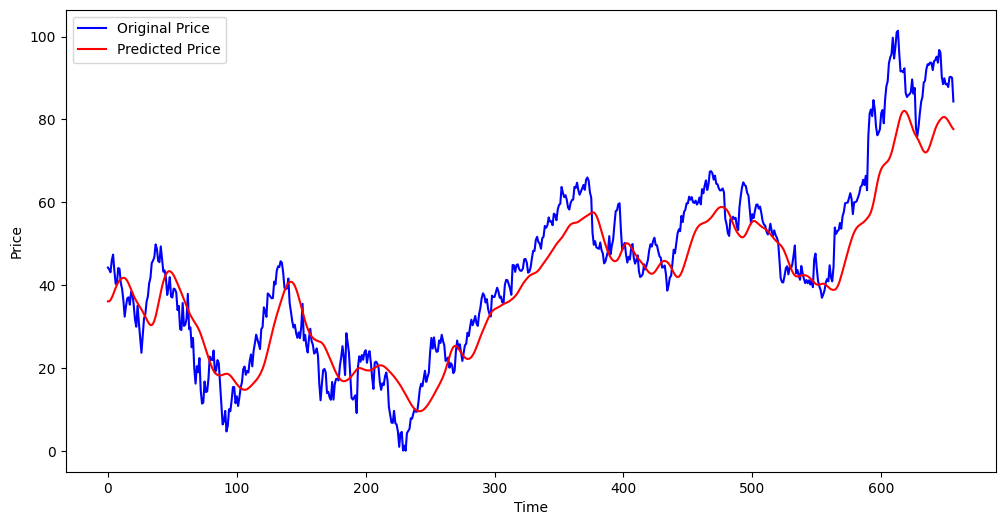

In [128]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [129]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  6.703222612602743


In [130]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared score (Accuracy) on test set: ", r2)

R-squared score (Accuracy) on test set:  0.8556077883591936
